### Data preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Development Workshops/data.csv")
print(f"Data size: {data.shape}")
data.head(n=3)

Data size: (398, 57)


,ID,Title,Journal,Year,Methods_text,Q1,Q1_just,Q2,Q2_just,Q3,...,A_just,B,B_just,C,C_just,D,D_just,E,E_just,F
0,1,Systematic review of the prevalence of Mycobac...,Journal of Chemotherapy,2015,We searched MEDLINE and EMBASE for articles ab...,0,There is no information on this item in the me...,0,There is no information on this item in the me...,0,...,There is no information on this item in the me...,1.0,The meta-analyses and Forest Plots were done u...,1.0,The heterogeneity of the included studies was ...,0.0,There is no information on this item in the me...,0.0,There is no information on this item in the me...,0.0
1,2,Prediction of Tumor Response to Neoadjuvant Th...,Radiology,2010,Materials and Methods Data Sources A computer-...,0,There is no information on this item in the me...,0,There is no information on this item in the me...,1,...,"For each study, reported criteria for tumor re...",1.0,"For each study, reported criteria for tumor re...",1.0,A Ï‡2 test was performed to test for heterogen...,0.0,There is no information on this item in the me...,1.0,A Ï‡2 test was performed to test for heterogen...,1.0
2,4,Induction opioids for caesarean section under ...,International Journal of Obstetric Anesthesia,2019,Methods Search strategy Two independent review...,1,MethodsSearch strategyTwo independent reviewer...,0,There is no information on this item in the me...,1,...,The combined data were analysed using RevMan 5...,1.0,The Mantel-Haenszel (M-H) random effects model...,1.0,Heterogeneity was assessed using the I2 statis...,0.0,There is no information on this item in the me...,0.0,There is no information on this item in the me...,0.0


In [4]:
data.isna().sum()

,0
ID,0
Title,0
Journal,0
Year,0
Methods_text,0
Q1,0
Q1_just,0
Q2,0
Q2_just,0
Q3,0


In [5]:
col_names = ([f"Q{id + 1}" for id in range(20)] + ["MA", "A", "B", "C", "D", "E", "F"])
print(col_names)

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'MA', 'A', 'B', 'C', 'D', 'E', 'F']


In [6]:
train_size = 0.8
split_index = int(data.shape[0] * train_size)
print(f"Train acticles: {split_index}\nTest acticles: {data.shape[0] - split_index}")

Train acticles: 318
Test acticles: 80


In [7]:
training_data = []
test_data = []
data_to_save = {"ID": [], "question_id" : [], "expected_output" : [], "expected_ans" : []}

for name in col_names:
  for i in range(data.shape[0]):
    if name in ["Q8", "F"]: #no just
      example = {"contents":
    [{
      'role': 'user',
      "parts": [{'text': f"""### Methods_text:
{data['Methods_text'][i]}

### {name} statement:
This systematic review claimed to comply with the PRISMA or other guidelines."""}]},

      {'role': 'model',
      "parts":  [{'text': f"""### {name}:
{data[name][i]}"""}]}]}

    else:
      example = {"contents":
    [{
      'role': 'user',
      "parts": [{'text': f"""### Methods_text:
{data['Methods_text'][i]}

### {name} statement:
This systematic review claimed to comply with the PRISMA or other guidelines."""}]},

      {'role': 'model',
      "parts":  [{'text': f"""### {name}:
{data[name][i]}

### {name}_just:
{data[f'{name}_just'][i]}"""
      }]}]}

    if str(data[name][i]) != "nan":
      if split_index > i:
        training_data.append(example)

      else:
        test_data.append(example)
        data_to_save['ID'].append(data["ID"][i])
        data_to_save['question_id'].append(name)
        data_to_save['expected_ans'].append(str(data[name][i]))
        data_to_save['expected_output'].append(example['contents'][1]['parts'][0]['text'])


print(data['Methods_text'][0])

We searched MEDLINE and EMBASE for articles about tuberculosis resistance in Saudi Arabia. We used the terms: Saudi Arabia, tuberculosis, Mycobacterium tuberculosis, drug resistance, drug susceptibility, and resistance. In addition, the references of the retrieved articles were manually searched to identify additional studies. Â  Data extraction The prevalence of drug resistance (number and percentage) and the number of tested isolates were extracted into an excel data collection sheet (Microsoft Excel 2010). Â  Statistical Analysis The meta-analyses and Forest Plots were done using a Microsoft Excel spreadsheet as described by Neyeloff et al.9 The random effects model was used and assumed that the prevalence of the studies followed a normal distribution.10 For cells with zero resistance rate, 0.5 was added to all cells of study results tables where zero was observed similar to the Mantel-Haenszel methods.11 The heterogeneity of the included studies was based on the I 2. I 2 describes 

In [8]:
pd.DataFrame(data_to_save)

,ID,question_id,expected_output,expected_ans
0,338,Q1,### Q1:\n1\n\n### Q1_just:\nWe conducted a sys...,1
1,339,Q1,### Q1:\n0\n\n### Q1_just:\nThere is no inform...,0
2,340,Q1,### Q1:\n0\n\n### Q1_just:\nThere is no inform...,0
3,341,Q1,### Q1:\n1\n\n### Q1_just:\nWe used the PRISMA...,1
4,343,Q1,### Q1:\n0\n\n### Q1_just:\nThere is no inform...,0
...,...,...,...,...
1903,412,F,### F:\n1.0,1.0
1904,413,F,### F:\n1.0,1.0
1905,416,F,### F:\n0.0,0.0
1906,421,F,### F:\n0.0,0.0


In [9]:
print(f"Train size: {len(training_data)}\nTest size: {len(test_data)}")

Train size: 7620
Test size: 1908


In [10]:
train_data = pd.DataFrame(training_data)
test_data = pd.DataFrame(test_data)
train_data['contents'][0]

[{'role': 'user',
  'parts': [{'text': '### Methods_text:\nWe searched MEDLINE and EMBASE for articles about tuberculosis resistance in Saudi Arabia. We used the terms: Saudi Arabia, tuberculosis, Mycobacterium tuberculosis, drug resistance, drug susceptibility, and resistance. In addition, the references of the retrieved articles were manually searched to identify additional studies. Â\xa0 Data extraction The prevalence of drug resistance (number and percentage) and the number of tested isolates were extracted into an excel data collection sheet (Microsoft Excel 2010). Â\xa0 Statistical Analysis The meta-analyses and Forest Plots were done using a Microsoft Excel spreadsheet as described by Neyeloff et al.9 The random effects model was used and assumed that the prevalence of the studies followed a normal distribution.10 For cells with zero resistance rate, 0.5 was added to all cells of study results tables where zero was observed similar to the Mantel-Haenszel methods.11 The heterogen

In [11]:
train_data

,contents
0,"[{'role': 'user', 'parts': [{'text': '### Meth..."
1,"[{'role': 'user', 'parts': [{'text': '### Meth..."
2,"[{'role': 'user', 'parts': [{'text': '### Meth..."
3,"[{'role': 'user', 'parts': [{'text': ""### Meth..."
4,"[{'role': 'user', 'parts': [{'text': '### Meth..."
...,...
7615,"[{'role': 'user', 'parts': [{'text': '### Meth..."
7616,"[{'role': 'user', 'parts': [{'text': '### Meth..."
7617,"[{'role': 'user', 'parts': [{'text': ""### Meth..."
7618,"[{'role': 'user', 'parts': [{'text': '### Meth..."


In [12]:
train_data.to_json("train_data.jsonl", orient="records", lines=True, force_ascii=False, index=False)
test_data.to_json("test_data.jsonl", orient="records", lines=True, force_ascii=False, index=False)

### Loading model

In [13]:
from google import genai
from google.genai import types
import base64

In [14]:
!gcloud auth application-default login

Go to the following link in your browser, and complete the sign-in prompts:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=764086051850-6qr4p6gpi6hn506pt8ejuq83di341hur.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fsdk.cloud.google.com%2Fapplicationdefaultauthcode.html&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fsqlservice.login&state=6otxvwrfQM2uD4xccSpyAdXW6Oz9AC&prompt=consent&token_usage=remote&access_type=offline&code_challenge=Ssi3Ll2rqi0x8Sg4CJDtGjNslxRgDoKbHZljRkEqeI0&code_challenge_method=S256

Once finished, enter the verification code provided in your browser: 4/0AVMBsJjZJgf1EuqfKte__1MCGW32fZcFakKVdtrK9dtUXyNzrpduFKUHYlq9cDtm9N6ErA

Credentials saved to file: [/content/.config/application_default_credentials.json]

These credentials will be used by any library that requests Application Default Credentials (ADC).
Ca

In [15]:
def generate(question):
  client = genai.Client(
      vertexai=True,
      project="91187579762",
      location="us-central1",
  )

  model = "projects/91187579762/locations/us-central1/endpoints/3357280690088443904"
  contents = [
    types.Content(
      role="user",
      parts = question
    )
  ]

  generate_content_config = types.GenerateContentConfig(
    temperature = 1,
    top_p = 0.95,
    max_output_tokens = 8192,
    safety_settings = [types.SafetySetting(
      category="HARM_CATEGORY_HATE_SPEECH",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_DANGEROUS_CONTENT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_SEXUALLY_EXPLICIT",
      threshold="OFF"
    ),types.SafetySetting(
      category="HARM_CATEGORY_HARASSMENT",
      threshold="OFF"
    )],
  )
  result = ""
  for chunk in client.models.generate_content_stream(
    model = model,
    contents = contents,
    config = generate_content_config,
    ):
    result = result+ chunk.text
  return result
# question = [{'text': '### Methods_text:\nData Sources and Study Selection The search for articles was conducted in the PubMed, Scopus, ScienceDirect, and Cochrane databases, on May 25, 2016, by two authors (KC and JM), independently. Research conducted by these authors was compared and equivalence verified in the search and selection of articles. The patient, intervention, comparison, and outcomes (PICO) strategy was used for the guiding questions of this review setting. The keywords â€œzinc,â€\x9d â€œobese.â€\x9d â€œobesity.â€\x9d â€œinsulin resistance.â€\x9d â€œinsulin sensibility.â€\x9d and â€œclinical trialâ€\x9d were used in the literature. The following descriptors crossings were used in the search for articles: â€œzinc and obes * and clinical trialâ€\x9d, â€œzinc and (insulin resistance or insulin sensitivity) and clinical trialâ€\x9d, â€œobes * and zinc and supplementationâ€\x9d, â€œobes * and zinc (insulin resistance or insulin sensitivity) â€œandâ€œ zinc and supplementation and (insulin resistance or insulin sensitivity)â€\x9d. This systematic review included clinical trials realized with human subjects, published in English or Spanish, without a publication year limit that evaluated the effect of zinc supplementation on insulin resistance in obese individuals without restrictions of gender, age, or ethnicity. Case studies, cross-sectional studies, case-control studies, review articles, and animal research were not included in this review. The study selection details are shown in Fig. 1. Relevant information collected from the articles studied in this review included authors, year of publication, place of conducting the survey, sample size, sex and age of the study population, dose and duration of zinc supplementation, control group or placebo, and evaluation methods for insulin resistance or insulin sensitivity. Assessment of Risk of Bias The recommendations of the Preferred Reporting Items for Systematic Reviews and Meta-Analyses (PRISMA) [17] were followed in the conduct of this review , in which a flow diagram was included to demonstrate how many publications were identified and screened for eligibility and how many publications were excluded and why.  The Cochrane Collaboration tool was used to assess the risk of bias of the trials included in this review [18].\n\n### Q1 statement:\nThis systematic review claimed to comply with the PRISMA or other guidelines.'}]
question = [{'text': '### Methods_text:\nData Sources and Study Selection The search for articles was conducted in the PubMed, Scopus, ScienceDirect, and Cochrane databases, on May 25, 2016, by two authors (KC and JM), independently. Research conducted by these authors was compared and equivalence verified in the search and selection of articles. The patient, intervention, comparison, and outcomes (PICO) strategy was used for the guiding questions of this review setting. The keywords â€œzinc,â€\x9d â€œobese.â€\x9d â€œobesity.â€\x9d â€œinsulin resistance.â€\x9d â€œinsulin sensibility.â€\x9d and â€œclinical trialâ€\x9d were used in the literature. The following descriptors crossings were used in the search for articles: â€œzinc and obes * and clinical trialâ€\x9d, â€œzinc and (insulin resistance or insulin sensitivity) and clinical trialâ€\x9d, â€œobes * and zinc and supplementationâ€\x9d, â€œobes * and zinc (insulin resistance or insulin sensitivity) â€œandâ€œ zinc and supplementation and (insulin resistance or insulin sensitivity)â€\x9d. This systematic review included clinical trials realized with human subjects, published in English or Spanish, without a publication year limit that evaluated the effect of zinc supplementation on insulin resistance in obese individuals without restrictions of gender, age, or ethnicity. Case studies, cross-sectional studies, case-control studies, review articles, and animal research were not included in this review. The study selection details are shown in Fig. 1. Relevant information collected from the articles studied in this review included authors, year of publication, place of conducting the survey, sample size, sex and age of the study population, dose and duration of zinc supplementation, control group or placebo, and evaluation methods for insulin resistance or insulin sensitivity. Assessment of Risk of Bias The recommendations of the Preferred Reporting Items for Systematic Reviews and Meta-Analyses (PRISMA) [17] were followed in the conduct of this review , in which a flow diagram was included to demonstrate how many publications were identified and screened for eligibility and how many publications were excluded and why.  The Cochrane Collaboration tool was used to assess the risk of bias of the trials included in this review [18].\n\n### Q1 statement:\nThis systematic review claimed to comply with the PRISMA or other guidelines.'}]
generate(question)

/usr/local/lib/python3.11/dist-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


'### Q1:\n1\n\n### Q1_just:\nThe recommendations of the Preferred Reporting Items for Systematic Reviews and Meta-Analyses (PRISMA) [17] were followed in the conduct of this review , in which a flow diagram was included to demonstrate how many publications were identified and screened for eligibility and how many publications were excluded and why.'

In [20]:
train_data['contents'][0]

[{'role': 'user',
  'parts': [{'text': '### Methods_text:\nWe searched MEDLINE and EMBASE for articles about tuberculosis resistance in Saudi Arabia. We used the terms: Saudi Arabia, tuberculosis, Mycobacterium tuberculosis, drug resistance, drug susceptibility, and resistance. In addition, the references of the retrieved articles were manually searched to identify additional studies. Â\xa0 Data extraction The prevalence of drug resistance (number and percentage) and the number of tested isolates were extracted into an excel data collection sheet (Microsoft Excel 2010). Â\xa0 Statistical Analysis The meta-analyses and Forest Plots were done using a Microsoft Excel spreadsheet as described by Neyeloff et al.9 The random effects model was used and assumed that the prevalence of the studies followed a normal distribution.10 For cells with zero resistance rate, 0.5 was added to all cells of study results tables where zero was observed similar to the Mantel-Haenszel methods.11 The heterogen

In [21]:
print(test_data['contents'][111][0]['parts'][0]['text'])
print("#"*100)
print(test_data['contents'][111][1]['parts'][0]['text'])

### Methods_text:
2.1. Eligibility Criteria 2.1.1. Types of Studies. All randomized controlled trials (RCTs) and quasi-RCTs and controlled trials examining the effect of FES on shoulder and upper arm outcomes were considered for this review. No language, publication date, or publication status restrictions were imposed to our database searches.   2.1.2. Types of Participants. Trials were considered if they included patients of any age or gender with a clinical diagnosis of stroke, either ischemic or hemorrhagic. Accordingly, trials that included patients with other neurological conditions leading to hemiplegia (e.g., head injury) were not included.   2.1.3. Types of Intervention. To be included in the review, the type of electrical stimulation, whether called FES, neuro-muscular electrical stimulation (NMES), or simply electrical stimulation, had to contain the characteristics of a typical FES, that is, stimulations that had a frequency of 10 to 50 HZ (typical frequency range of FES [1

### Model evaluation

In [22]:
from tqdm import tqdm
import time
results = {"question": [], "true_answer" : [], "model_answer": []}
data_to_save["actual_output"] = []
data_to_save["output_ok_or_not"] = []
data_to_save["actual_ans"] = []
data_to_save["ans_ok_or_not"] = []

for id, _ in tqdm(enumerate(test_data['contents'])):
    results["question"].append(test_data['contents'][id][0]['parts'][0]['text'])
    results["true_answer"].append(test_data['contents'][id][1]['parts'][0]['text'])
    while True:
      try:
        output = generate(test_data['contents'][id][0]['parts'])
        results["model_answer"].append(output)
        break
      except:
        time.sleep(1)

    data_to_save["actual_output"].append(output)
    data_to_save["actual_ans"].append(output.split("\n")[1])
    # if id>=10: # for early stopping
    #     break

0it [00:00, ?it/s]/usr/local/lib/python3.11/dist-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
1it [00:05,  5.36s/it]/usr/local/lib/python3.11/dist-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
2it [00:07,  3.56s/it]/usr/local/lib/python3.11/dist-packages/google/auth/_default.py:76: UserWarning: Your ap

In [23]:
max_len = max(len(v) for v in data_to_save.values())
data_to_save = {k: v + [np.nan] * (max_len - len(v)) for k, v in data_to_save.items()}

pd_data_to_save = pd.DataFrame(data_to_save, columns=['ID',	'question_id',	'expected_output', "actual_output",	'output_ok_or_not', 'expected_ans',	'actual_ans',	'ans_ok_or_not'])
pd_data_to_save["ans_ok_or_not"] = pd_data_to_save['expected_ans'] == pd_data_to_save['actual_ans']
pd_data_to_save["output_ok_or_not"] = pd_data_to_save['expected_output'] == pd_data_to_save['actual_output']
pd_data_to_save = pd_data_to_save.dropna()
pd_data_to_save

,ID,question_id,expected_output,actual_output,output_ok_or_not,expected_ans,actual_ans,ans_ok_or_not
0,338,Q1,### Q1:\n1\n\n### Q1_just:\nWe conducted a sys...,### Q1:\n1\n\n### Q1_just:\nWe conducted a sys...,False,1,1,True
1,339,Q1,### Q1:\n0\n\n### Q1_just:\nThere is no inform...,### Q1:\n1\n\n### Q1_just:\nThe conduct of the...,False,0,1,False
2,340,Q1,### Q1:\n0\n\n### Q1_just:\nThere is no inform...,### Q1:\n0\n\n### Q1_just:\nThere is no inform...,True,0,0,True
3,341,Q1,### Q1:\n1\n\n### Q1_just:\nWe used the PRISMA...,### Q1:\n1\n\n### Q1_just:\nWe used the PRISMA...,True,1,1,True
4,343,Q1,### Q1:\n0\n\n### Q1_just:\nThere is no inform...,### Q1:\n0\n\n### Q1_just:\nThere is no inform...,True,0,0,True
...,...,...,...,...,...,...,...,...
1903,412,F,### F:\n1.0,### F:\n0.0,False,1.0,0.0,False
1904,413,F,### F:\n1.0,### F:\n0.0,False,1.0,0.0,False
1905,416,F,### F:\n0.0,### F:\n0.0,True,0.0,0.0,True
1906,421,F,### F:\n0.0,### F:\n0.0,True,0.0,0.0,True


In [24]:
pd_data_to_save

,ID,question_id,expected_output,actual_output,output_ok_or_not,expected_ans,actual_ans,ans_ok_or_not
0,338,Q1,### Q1:\n1\n\n### Q1_just:\nWe conducted a sys...,### Q1:\n1\n\n### Q1_just:\nWe conducted a sys...,False,1,1,True
1,339,Q1,### Q1:\n0\n\n### Q1_just:\nThere is no inform...,### Q1:\n1\n\n### Q1_just:\nThe conduct of the...,False,0,1,False
2,340,Q1,### Q1:\n0\n\n### Q1_just:\nThere is no inform...,### Q1:\n0\n\n### Q1_just:\nThere is no inform...,True,0,0,True
3,341,Q1,### Q1:\n1\n\n### Q1_just:\nWe used the PRISMA...,### Q1:\n1\n\n### Q1_just:\nWe used the PRISMA...,True,1,1,True
4,343,Q1,### Q1:\n0\n\n### Q1_just:\nThere is no inform...,### Q1:\n0\n\n### Q1_just:\nThere is no inform...,True,0,0,True
...,...,...,...,...,...,...,...,...
1903,412,F,### F:\n1.0,### F:\n0.0,False,1.0,0.0,False
1904,413,F,### F:\n1.0,### F:\n0.0,False,1.0,0.0,False
1905,416,F,### F:\n0.0,### F:\n0.0,True,0.0,0.0,True
1906,421,F,### F:\n0.0,### F:\n0.0,True,0.0,0.0,True


In [26]:
pd_data_to_save.to_csv("pd_data_to_save.csv")
# results.to_csv("results.csv")

In [31]:
class_score = {"correct": 0, "incorrect": 0}
just_score = {"correct": 0, "incorrect": 0}


for id, _ in enumerate(results["true_answer"]):
    try:
        _, true_bin_answer, _, _, true_just = results["true_answer"][id].split("\n")
        _, model_bin_answer, _, _, model_just = results["model_answer"][id].split("\n")

        if true_bin_answer == model_bin_answer:
            class_score["correct"]+=1
        else:
            class_score["incorrect"]+=1

        if true_just == model_just:
            just_score["correct"]+=1
        else:
            just_score["incorrect"]+=1
    except:
        pass

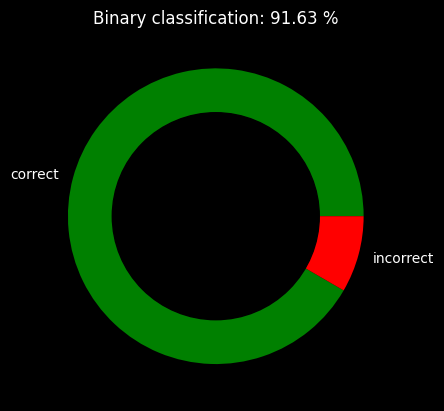

In [32]:
import matplotlib.pyplot as plt
names = 'correct', "incorrect"
size = [class_score["correct"], class_score["incorrect"]]
fig = plt.figure()
fig.patch.set_facecolor('black')

colors = ['green', 'red']
plt.rcParams['text.color'] = 'white'

my_circle=plt.Circle( (0,0), 0.7, color='black')

plt.pie(size, labels=names, colors=colors)
plt.title(f"Binary classification: {round(class_score['correct'] / (class_score['correct'] + class_score['incorrect']) * 100, 2)} %")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

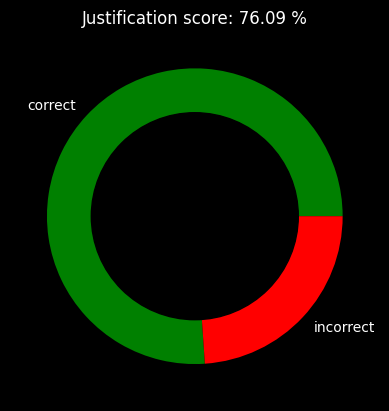

In [33]:
import matplotlib.pyplot as plt
names = 'correct', "incorrect"
size = [just_score["correct"], just_score["incorrect"]]
fig = plt.figure()
fig.patch.set_facecolor('black')

colors = ['green', 'red']
plt.rcParams['text.color'] = 'white'

my_circle=plt.Circle( (0,0), 0.7, color='black')

plt.pie(size, labels=names, colors=colors)
plt.title(f"Justification score: {round(just_score['correct'] / (just_score['correct'] + just_score['incorrect']) * 100, 2)} %")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [34]:
pd.DataFrame(results).to_csv("results.csv")

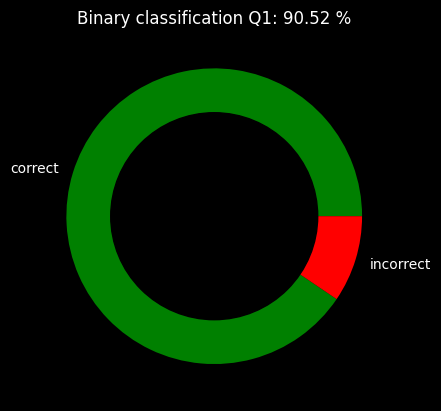

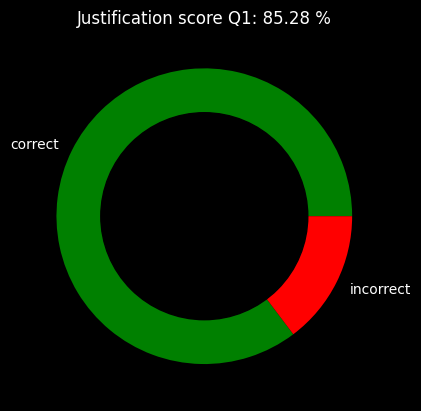

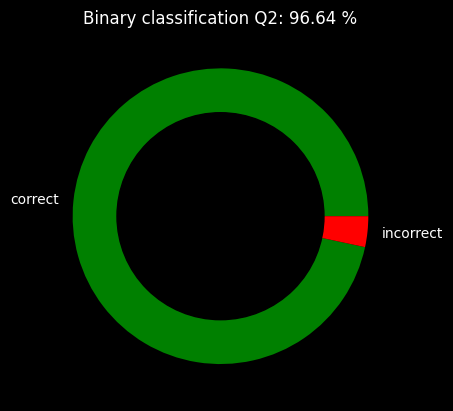

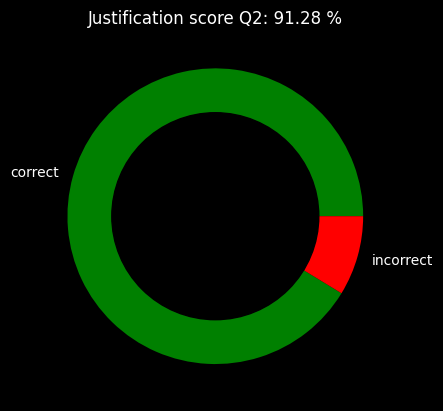

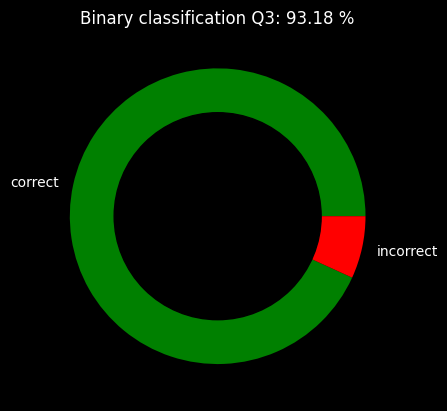

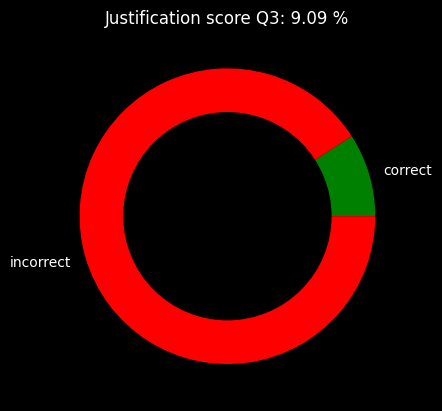

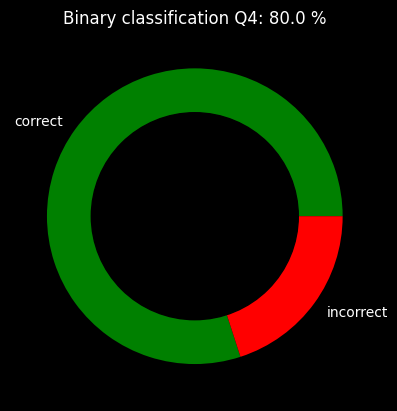

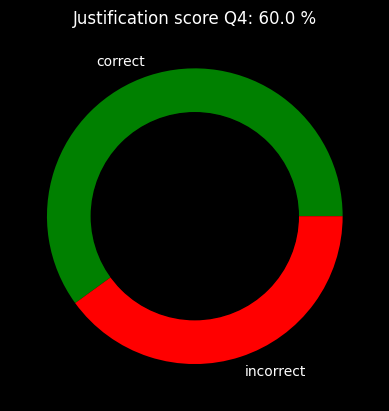

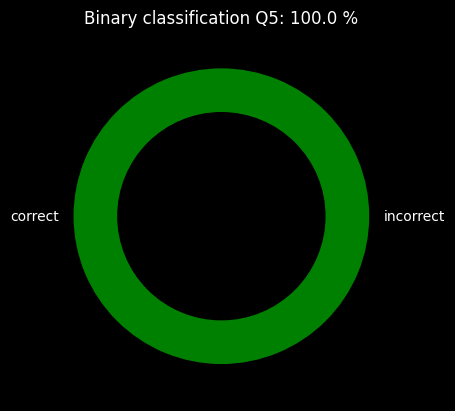

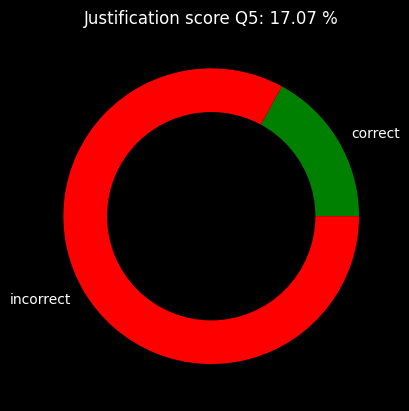

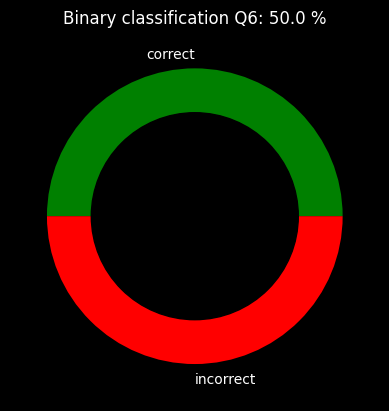

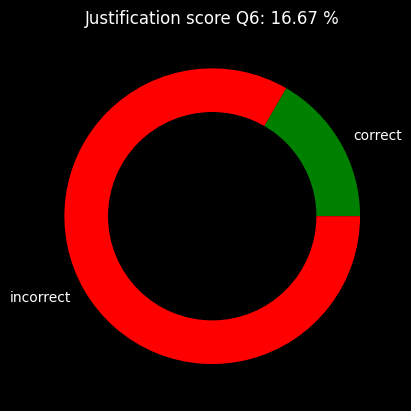

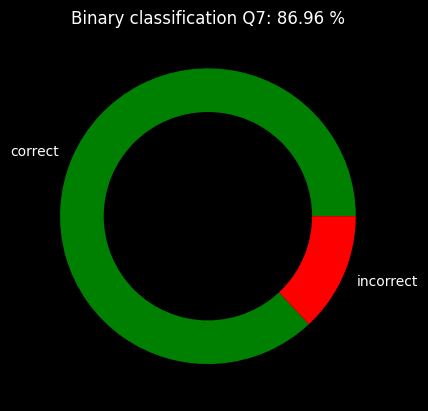

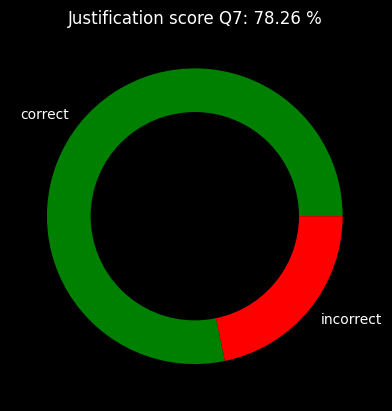

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

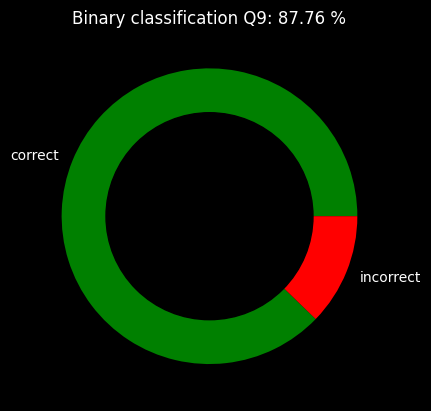

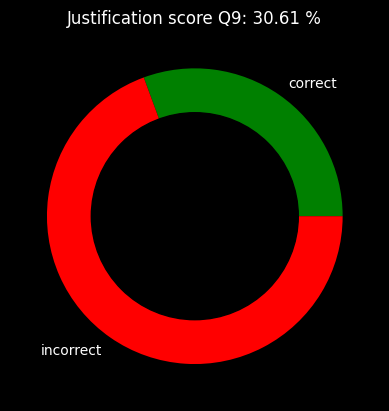

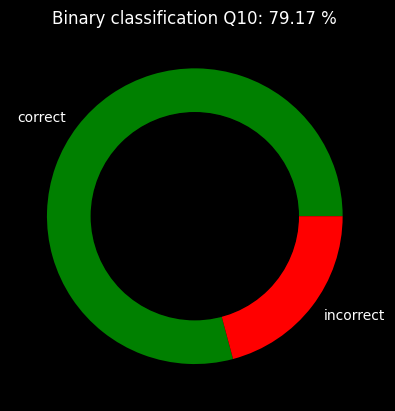

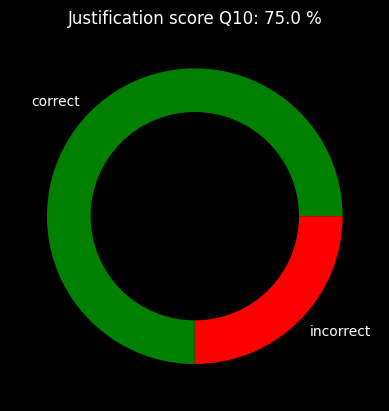

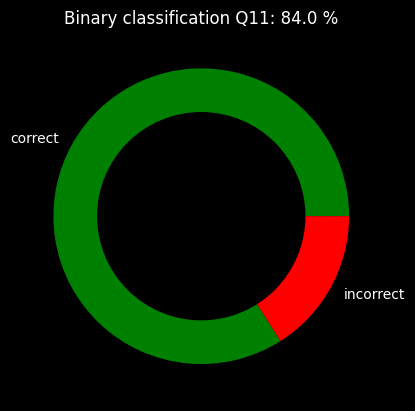

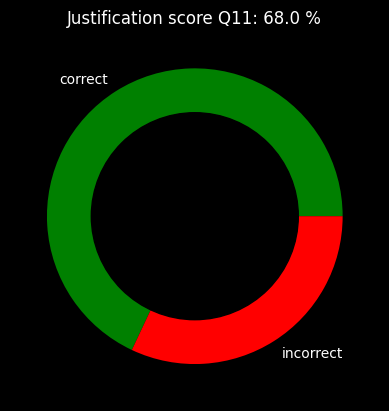

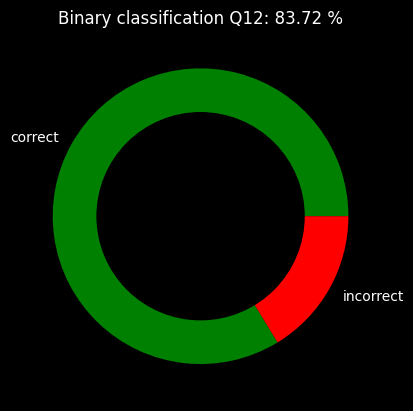

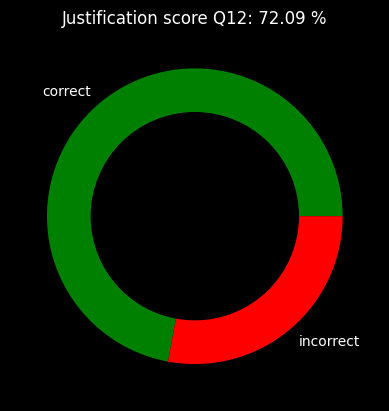

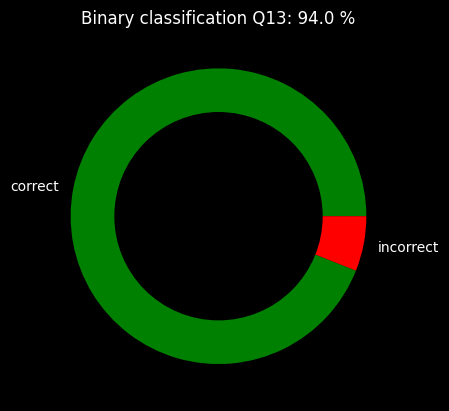

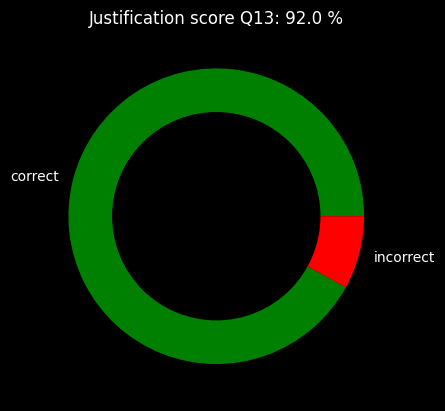

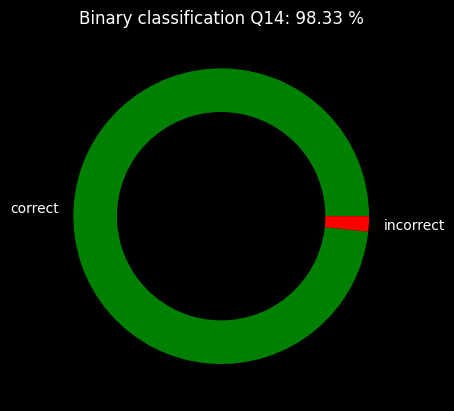

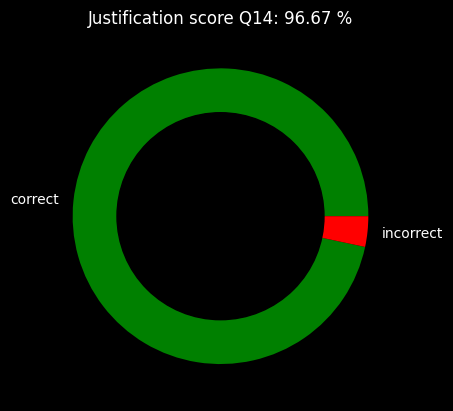

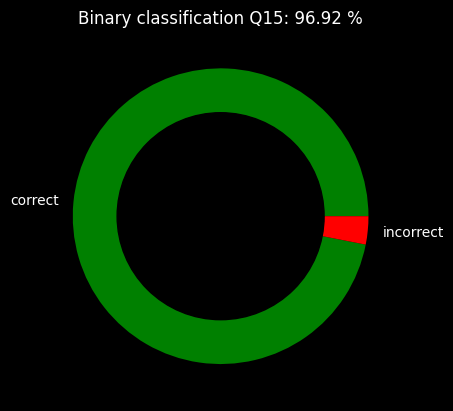

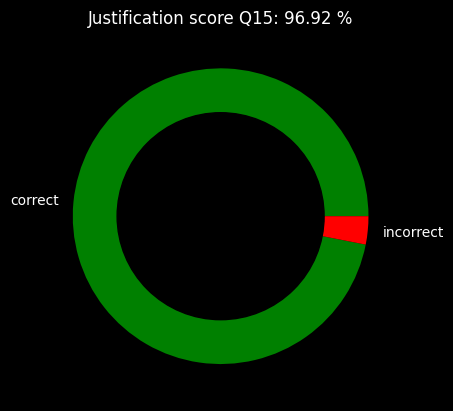

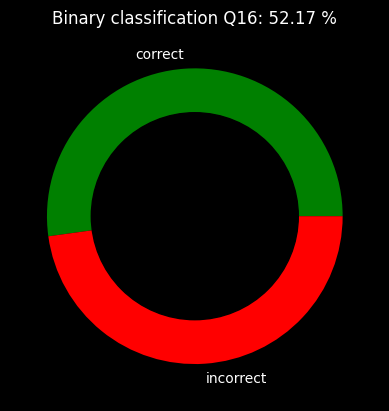

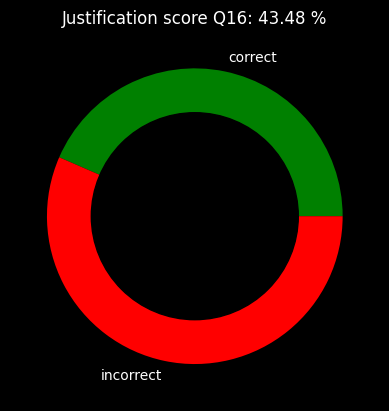

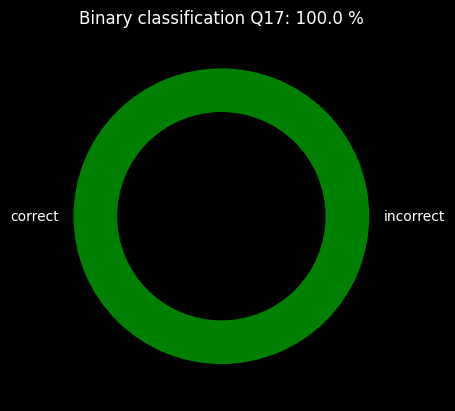

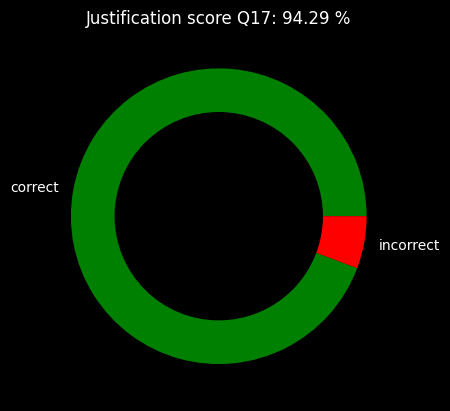

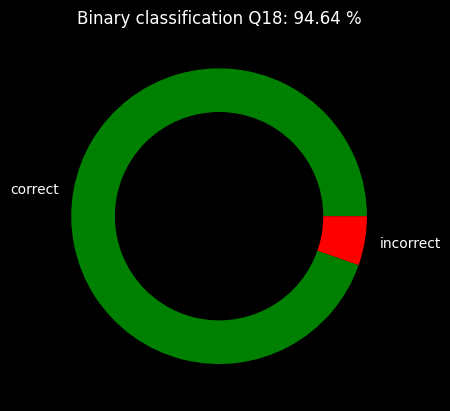

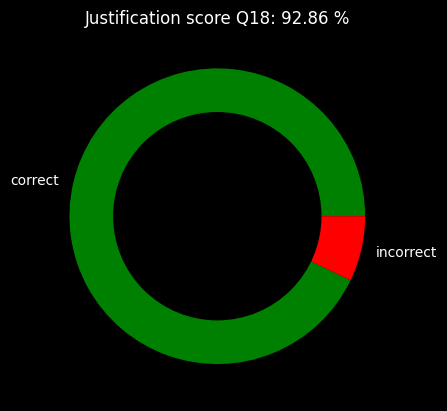

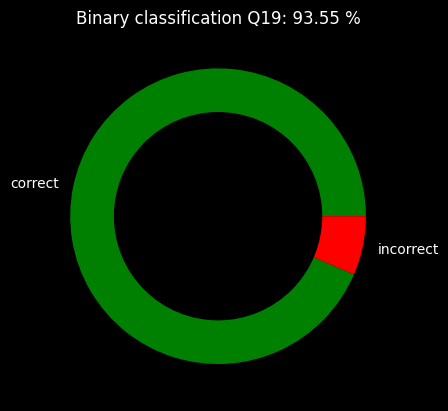

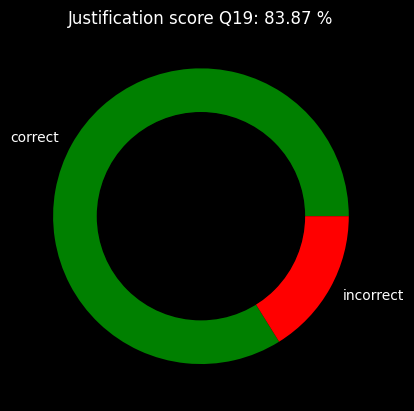

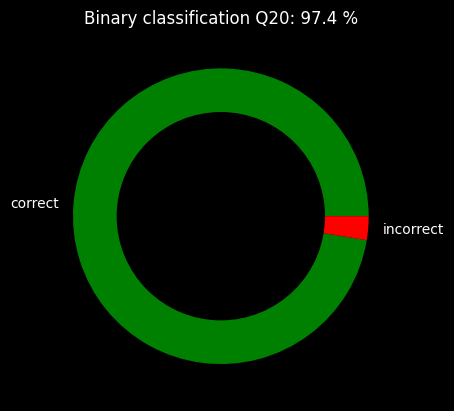

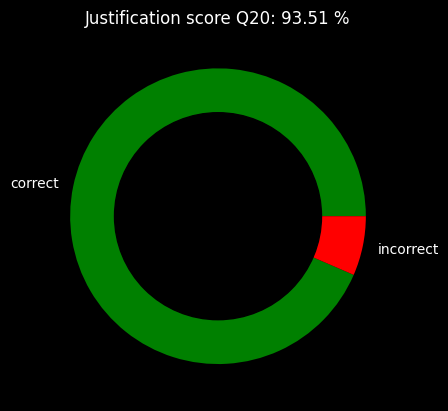

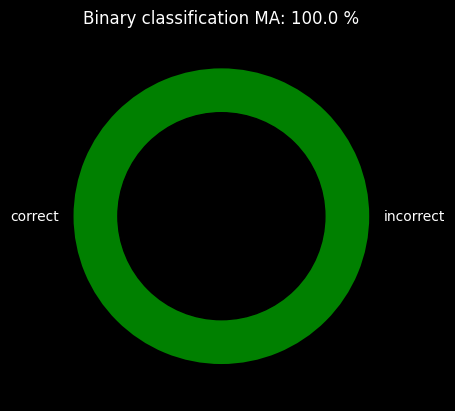

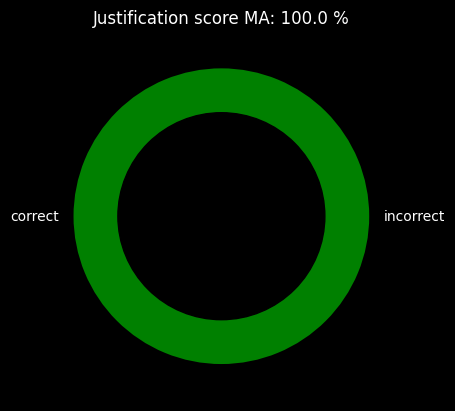

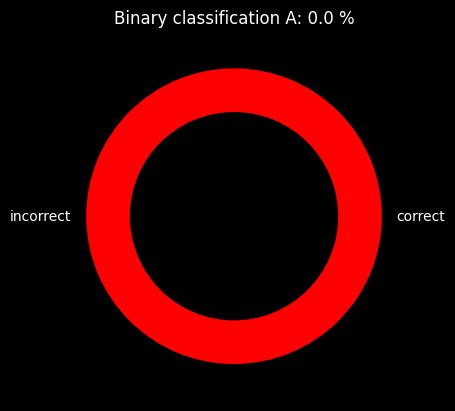

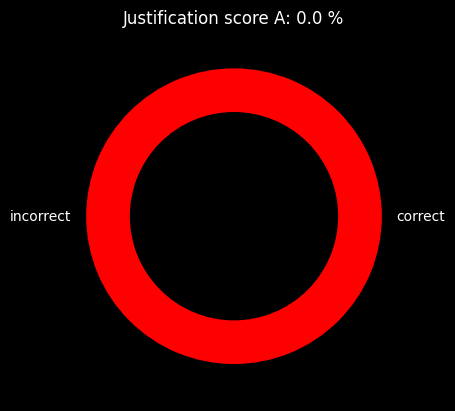

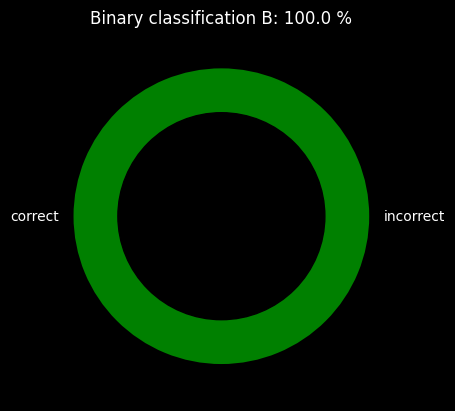

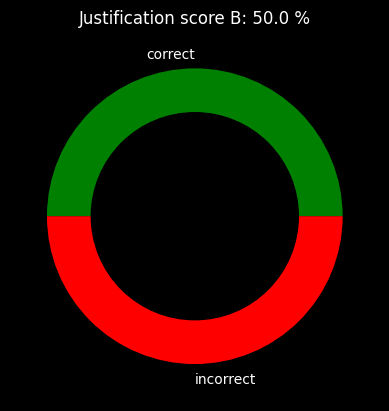

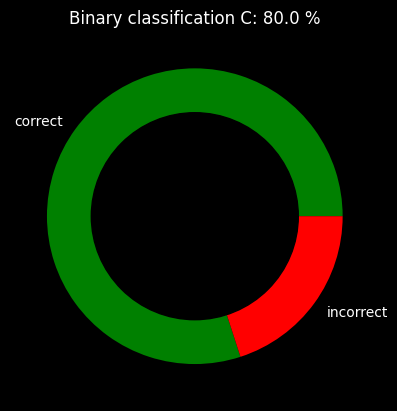

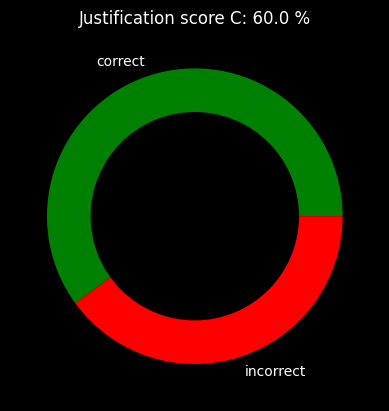

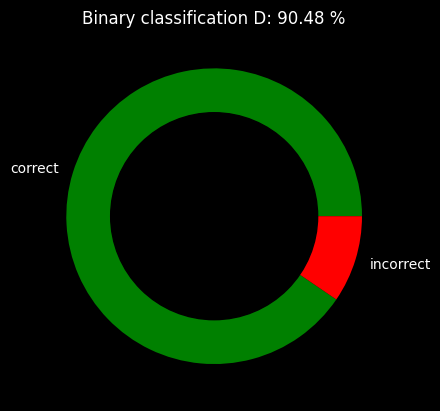

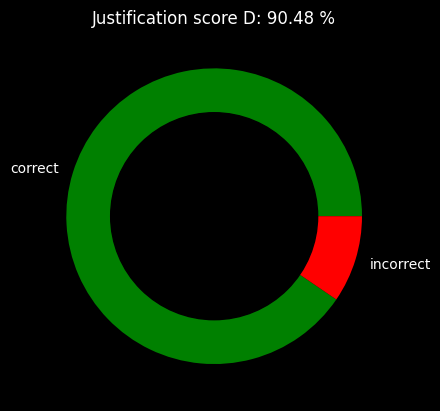

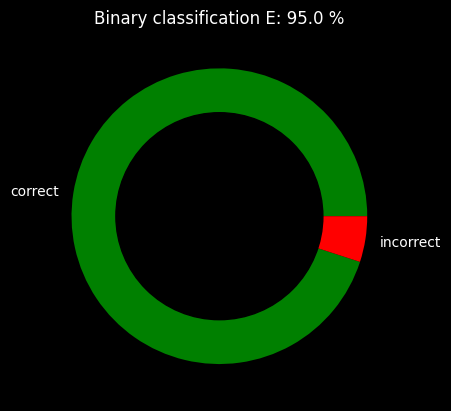

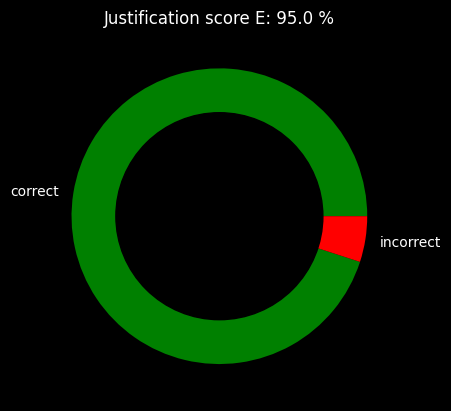

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [65]:
for col_name in col_names:
  # col_name = "Q1"
  class_score = {"correct": 0, "incorrect": 0}
  just_score = {"correct": 0, "incorrect": 0}
  for id, _ in enumerate(results["true_answer"]):
    if f"### {col_name}" in results["true_answer"][id]:
      try:
          _, true_bin_answer, _, _, true_just = results["true_answer"][id].split("\n")
          _, model_bin_answer, _, _, model_just = results["model_answer"][id].split("\n")

          if true_bin_answer == model_bin_answer:
              class_score["correct"]+=1
          else:
              class_score["incorrect"]+=1

          if true_just == model_just:
              just_score["correct"]+=1
          else:
              just_score["incorrect"]+=1
      except:
          pass

  names = 'correct', "incorrect"
  size = [class_score["correct"], class_score["incorrect"]]
  fig = plt.figure()
  fig.patch.set_facecolor('black')
  colors = ['green', 'red']
  plt.rcParams['text.color'] = 'white'
  if size != [0, 0]:
    my_circle=plt.Circle( (0,0), 0.7, color='black')
    plt.pie(size, labels=names, colors=colors)
    plt.title(f"Binary classification {col_name}: {round(class_score['correct'] / (class_score['correct'] + class_score['incorrect']) * 100, 2)} %")
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()


  size = [just_score["correct"], just_score["incorrect"]]
  fig = plt.figure()
  fig.patch.set_facecolor('black')
  colors = ['green', 'red']
  plt.rcParams['text.color'] = 'white'
  if size != [0, 0]:
    my_circle=plt.Circle( (0,0), 0.7, color='black')
    plt.pie(size, labels=names, colors=colors)
    plt.title(f"Justification score {col_name}: {round(just_score['correct'] / (just_score['correct'] + just_score['incorrect']) * 100, 2)} %")
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.show()

In [58]:
names

('correct', 'incorrect')